In [1]:
# 확률분포 시각화
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform, norm, expon, binom, poisson

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

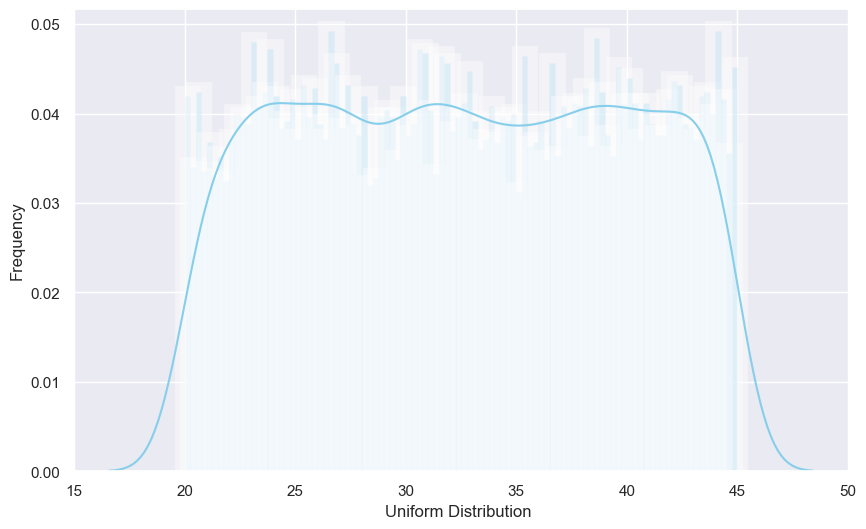

In [2]:
# Uniform Distribution
import warnings
warnings.filterwarnings(action='ignore')


number = 10000
start = 20
width = 25

uniform_data = uniform.rvs(size=number, loc=start, scale=width)
axis = sns.distplot(uniform_data, bins=100, kde=True, color='skyblue', 
                    hist_kws={"linewidth": 15})
axis.set(xlabel='Uniform Distribution ', ylabel='Frequency')

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

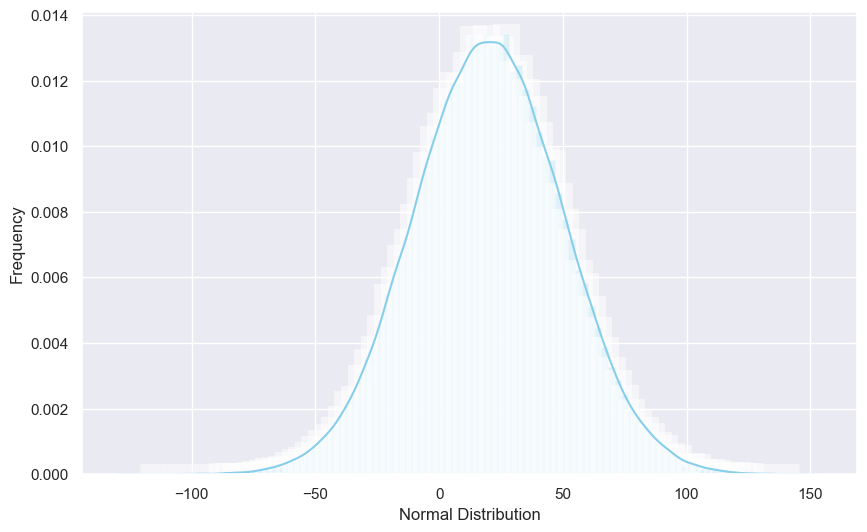

In [3]:
# Normal distribution

normal_data = norm.rvs(size=90000,loc=20,scale=30)
axis = sns.distplot(normal_data, bins=100, kde=True, color='skyblue', 
                    hist_kws={"linewidth": 15,'alpha':0.568})
axis.set(xlabel='Normal Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

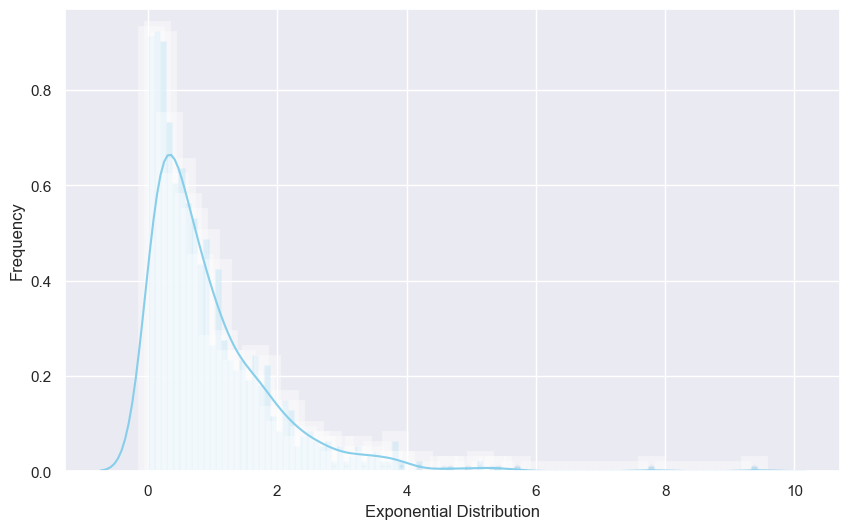

In [4]:
# Exponential distribution

expon_data = expon.rvs(scale=1,loc=0,size=1000)
axis = sns.distplot(expon_data, kde=True, bins=100, color='skyblue', 
                    hist_kws={"linewidth": 15})
axis.set(xlabel='Exponential Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

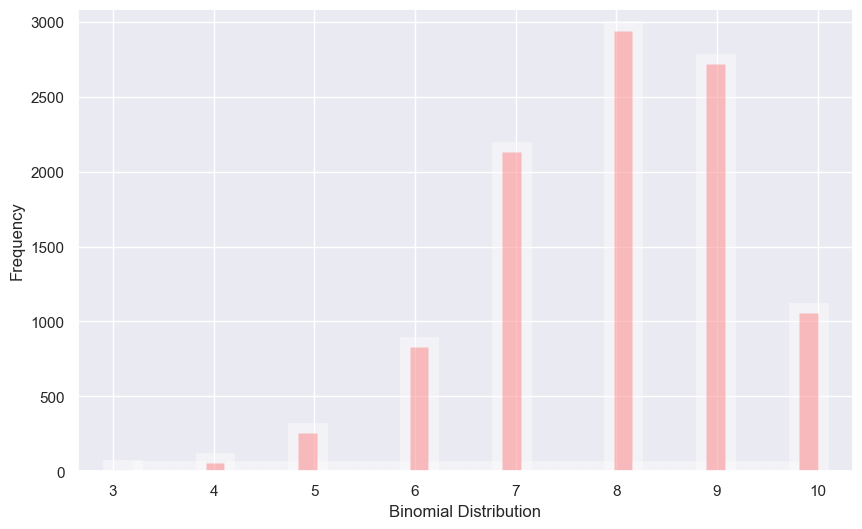

In [5]:
binomial_data = binom.rvs(n=10, p=0.8,size=10000)

axis = sns.distplot(binomial_data, kde=False, color='red', 
                    hist_kws={"linewidth": 15})
axis.set(xlabel='Binomial Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

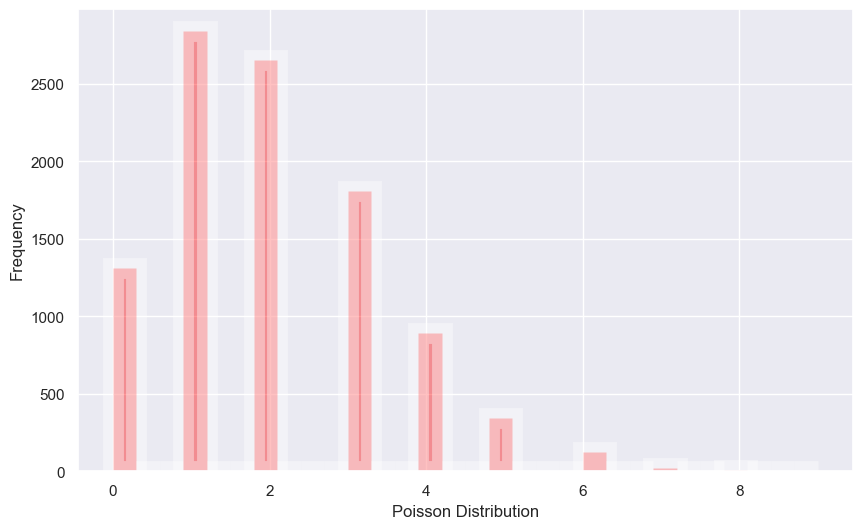

In [6]:
poisson_data = poisson.rvs(mu=2, size=10000)
axis = sns.distplot(poisson_data, bins=30, kde=False, color='red', 
                    hist_kws={"linewidth": 15})
axis.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [7]:
# 데이터 정제 사례

# loading data set as Pandas dataframe
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/"
                 "hands-on-exploratory-data-analysis-with-python/"
                 "master/Chapter%205/data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
# 결측치 탐지 및 대체
# 문자열로 된 숫자의 결측치 탐지: isnumeric(), value_counts()이용

# 열 평균값으로 대체

# 숫자로 된 문자열 여부 체크 
# isnumeric(): 숫자로 된 문자열이 있는지 체크해주는 함수
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [10]:
# 숫자가 아닌 문자열 행의 값 체크
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [11]:
#결측치를 제외한 나머지 값 평균 구하기 
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
print(pmean)

13207.129353233831


In [12]:
#pmean = price.astype(str).astype(int).mean()
#결측치를 평균값으로 대체 
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [13]:
# horsepower 결측치 정제 
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [14]:
# Normalized losses열 정제 
df[df['normalized-losses']=='?'].count()

symboling            41
normalized-losses    41
make                 41
fuel-type            41
aspiration           41
num-of-doors         41
body-style           41
drive-wheels         41
engine-location      41
wheel-base           41
length               41
width                41
height               41
curb-weight          41
engine-type          41
num-of-cylinders     41
engine-size          41
fuel-system          41
bore                 41
stroke               41
compression-ratio    41
horsepower           41
peak-rpm             41
city-mpg             41
highway-mpg          41
price                41
dtype: int64

In [15]:
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?']
nmean=nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [16]:
# 결측치 탐지 및 삭제
# 문자열로 된 숫자의 결측치 탐지: to_numeric()

# 결측치 삭제

# bore 열 정제
# ? 값 있는 행 찾기 
df['bore'].loc[df['bore'] == '?']  #bore 엔진 실린더 직경

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [17]:
# 숫자가 아닌 값을 결측치 NaN으로 만들기
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')  
# errors='coerce' 문자열을 강제로 숫자로 바꾸면서 결측치는 NaN으로 바꿈
df.bore[[55,56,57,58]].head()

55   NaN
56   NaN
57   NaN
58   NaN
Name: bore, dtype: float64

In [18]:
# stoke 열 정제
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df['stroke'].head()

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [19]:
# peak-rpm 열 정제 
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['peak-rpm'].head()

0    5000.0
1    5000.0
2    5000.0
3    5500.0
4    5500.0
Name: peak-rpm, dtype: float64

In [20]:
# num-of-doors 열 정제하기
# '?'값을 가지는 행 파악 
df['num-of-doors'].loc[df['num-of-doors'] == '?']

27    ?
63    ?
Name: num-of-doors, dtype: object

In [21]:
# ? 값을 가지는 행 삭제
df= df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [22]:
# 기초 통계량 계산해보기
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.000000
mean,0.837438,121.871921,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.463054,5125.870647,25.172414,30.699507,13241.911330
std,1.250021,31.784599,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,39.612384,479.820136,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [23]:
# 기초 통계량 계산해보기
# height열 Serires 추출 
height =df["height"]
print(height)
type(height)

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: height, Length: 203, dtype: float64


pandas.core.series.Series

In [24]:
mean = height.mean()
median =height.median()
mode = height.mode()
print(mean , median, mode)

53.73152709359606 54.1 0    50.8
Name: height, dtype: float64


In [25]:
df.height.mean()

53.73152709359606

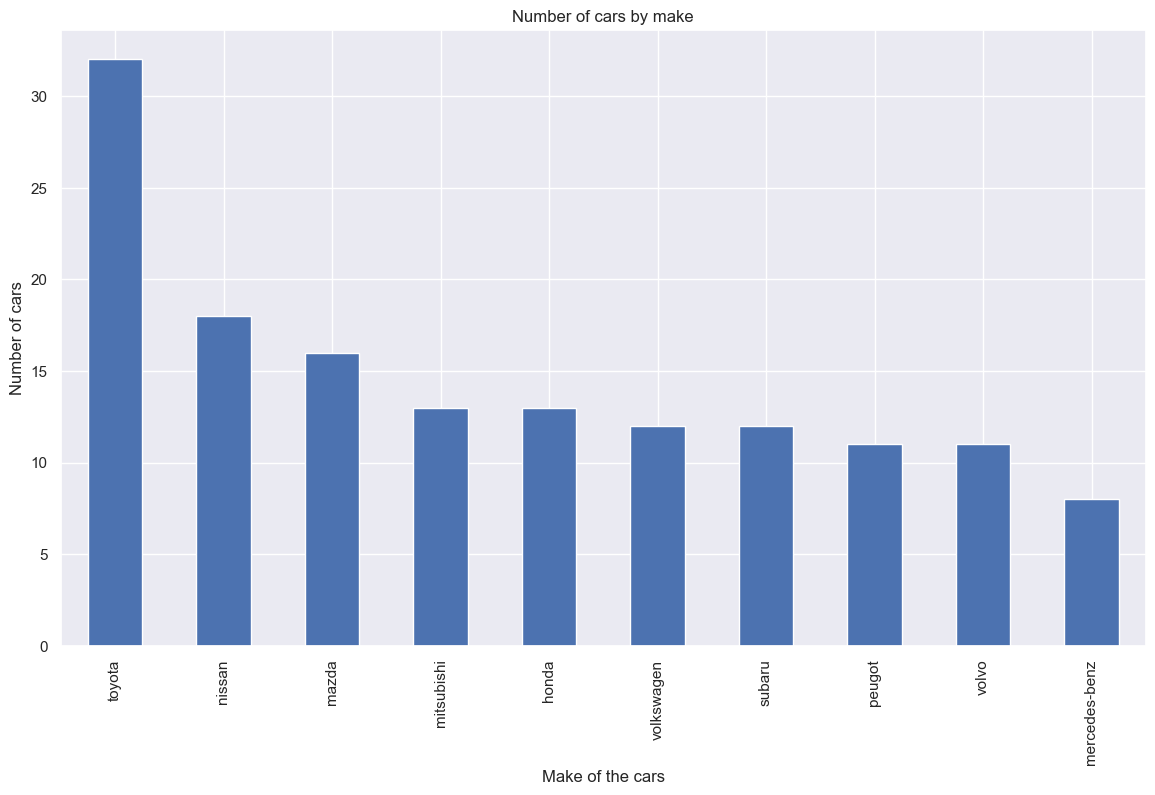

In [26]:
# 명목형 변수의 막대 그래프 시각화

df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(14,8)) 
# nlargest(10),  열에서 가장 큰 값 10개 선택
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make of the cars');

In [27]:
#drive-wheels 명목형 변수 속성 카운트 
drive_wheels_count =df["drive-wheels"].value_counts()
print(drive_wheels_count)

fwd    118
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


In [28]:
# 산포 계산
#std() function 표준편차 계산
std_dev =df.std()
print(std_dev)
# 특정 열의 표준편차 계산
sv_height=df.loc[:,"height"].std()
print(sv_height)

symboling               1.250021
normalized-losses      31.784599
wheel-base              6.040994
length                 12.339090
width                   2.150274
height                  2.442526
curb-weight           522.557049
engine-size            41.797123
bore                    0.274054
stroke                  0.318023
compression-ratio       3.888216
horsepower             39.612384
peak-rpm              479.820136
city-mpg                6.529812
highway-mpg             6.874645
price                7898.957924
dtype: float64
2.4425257040318664


In [29]:
# var() function 분산 계산
variance=df.var()
print(variance)
# 특정 열의 분산 계산 
var_height=df.loc[:,"height"].var()
print(var_height)

symboling            1.562552e+00
normalized-losses    1.010261e+03
wheel-base           3.649361e+01
length               1.522531e+02
width                4.623677e+00
height               5.965932e+00
curb-weight          2.730659e+05
engine-size          1.746999e+03
bore                 7.510565e-02
stroke               1.011384e-01
compression-ratio    1.511822e+01
horsepower           1.569141e+03
peak-rpm             2.302274e+05
city-mpg             4.263844e+01
highway-mpg          4.726074e+01
price                6.239354e+07
dtype: float64
5.965931814856364


In [30]:
df.loc[:,"height"].var()

5.965931814856364

In [31]:
# 왜도 계산
df.skew()

symboling            0.204275
normalized-losses    0.864408
wheel-base           1.041170
length               0.154086
width                0.900685
height               0.064134
curb-weight          0.668942
engine-size          1.934993
bore                 0.013419
stroke              -0.669515
compression-ratio    2.682640
horsepower           1.391224
peak-rpm             0.073094
city-mpg             0.673533
highway-mpg          0.549104
price                1.812335
dtype: float64

In [32]:
# 특정 열의 왜도 계산
df.loc[:,"height"].skew()

0.06413448813322854

In [33]:
# 첨도 계산
kurtosis =df.kurt()
print(kurtosis)

# 특정 열의 첨도 계산 
sk_height=df.loc[:,"height"].kurt()
print(sk_height)

symboling           -0.691709
normalized-losses    1.403077
wheel-base           0.986065
length              -0.075680
width                0.687375
height              -0.429298
curb-weight         -0.069648
engine-size          5.233661
bore                -0.830965
stroke               2.030592
compression-ratio    5.643878
horsepower           2.646625
peak-rpm             0.068155
city-mpg             0.624470
highway-mpg          0.479323
price                3.287412
dtype: float64
-0.4292976016374439


In [34]:
# 산점도 그리기

sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

Text(0, 0.5, 'price')

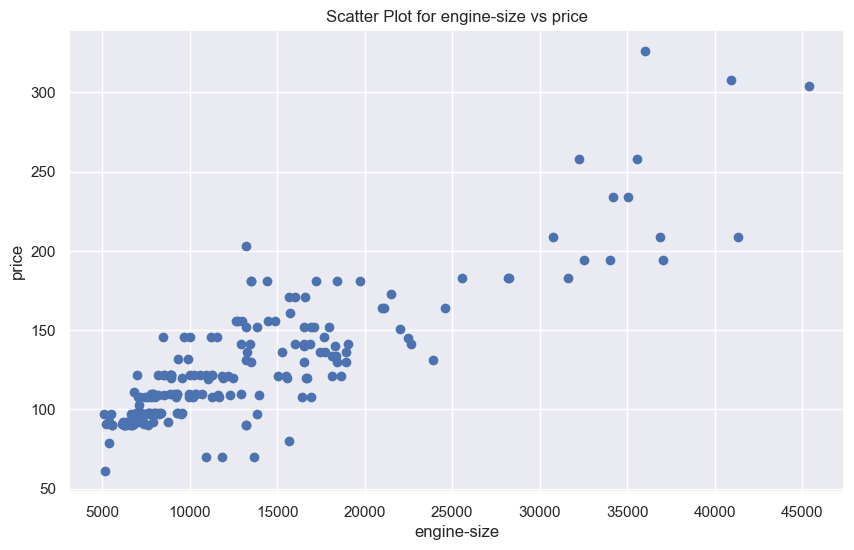

In [35]:
# “engine-size”, "price” 의 산점도
plt.scatter(df["price"], df["engine-size"])
plt.title("Scatter Plot for engine-size vs price")
plt.xlabel("engine-size")
plt.ylabel("price")

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

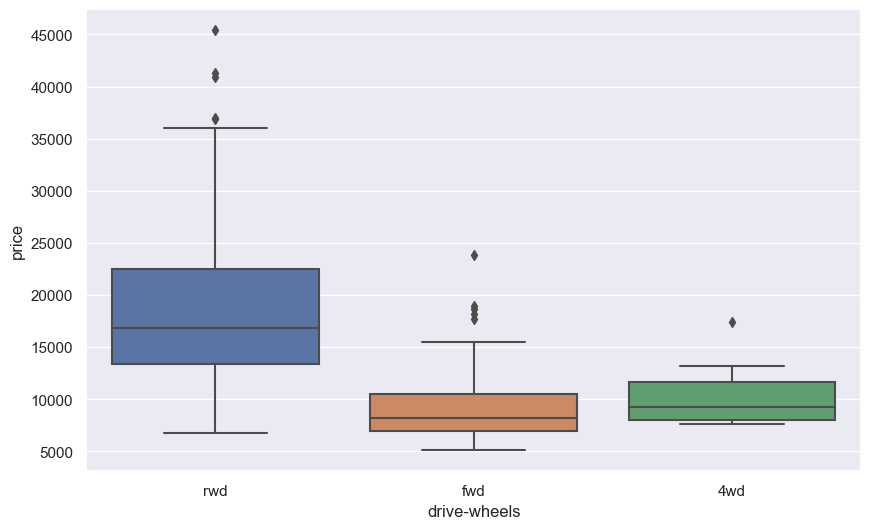

In [36]:
#boxplot
sns.boxplot(x="drive-wheels", y="price",data=df)

In [37]:
# Percentiles(백분위수) 계산하기

# height열의 50th percentile 계산
height = df["height"]
percentile = np.percentile(height, 50)
print(percentile)

54.1


In [38]:
# IQR 사분위숭
price = df.price.sort_values()
Q1 = np.percentile(price, 25)
Q2 = np.percentile(price, 50)
Q3 = np.percentile(price, 75)

IQR = Q3 - Q1
IQR

8718.5

In [39]:
min=df.price.quantile(0) #quantile(0~1사이의 값)
Q1=df.price.quantile(0.25)
Q2=df.price.quantile(0.5)
Q3=df.price.quantile(0.75)
max=df.price.quantile(1)
print(min, Q1, Q2, Q3, max)
print(Q3-Q1) # IQR

5118.0 7781.5 10595.0 16500.0 45400.0
8718.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1a2c70e6100>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2c70e65e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2c70d7e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2c70e6b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2c70f40a0>],
 'means': [<matplotlib.lines.Line2D at 0x1a2c70e6dc0>]}

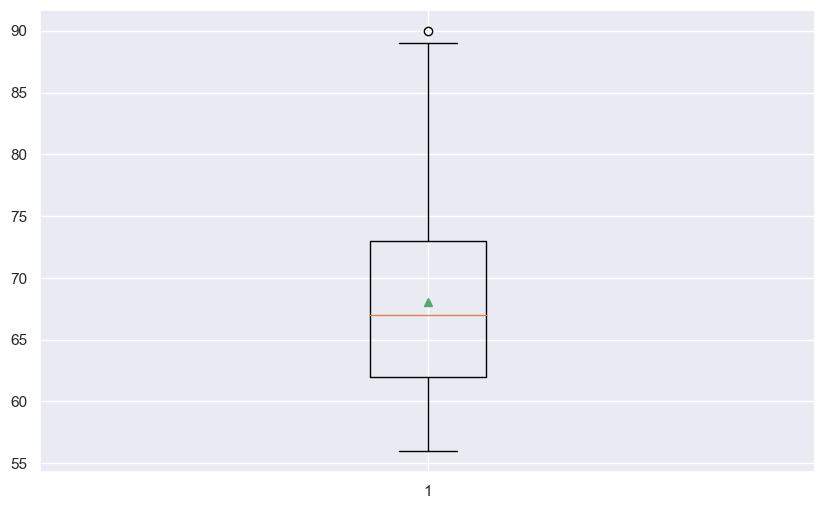

In [40]:
# 박스플롯 그려보기
scorePhysics = [34,35,35,35,35,35,36,36,37,37,37,37,37,38,38,38,39,39,
   40,40,40,40,40,41,42,42,42,42,42,42,42,42,43,43,43,43,44,44,44,44,44,44,45,
   45,45,45,45,46,46,46,46,46,46,47,47,47,47,47,47,48,48,48,48,48,49,49,49,49,
   49,49,49,49,52,52,52,53,53,53,53,53,53,53,53,54,54,
   54,54,54,54,54,55,55,55,55,55,56,56,56,56,56,56,57,57,57,58,58,59,59,59,59,
   59,59,59,60,60,60,60,60,60,60,61,61,61,61,61,62,62,63,63,63,63,63,64,64,64,
   64,64,64,64,65,65,65,66,66,67,67,68,68,68,68,68,68,68,69,70,71,71,71,72,72,
   72,72,73,73,74,75,76,76,76,76,77,77,78,79,79,80,80,81,84,84,85,85,87,87,88]
            
scoreLiterature = [49,49,50,51,51,52,52,52,52,53,54,54,55,55,55,55,56,
   56,56,56,56,57,57,57,58,58,58,59,59,59,60,60,60,60,60,60,60,61,61,61,62,
   62,62,62,63,63,67,67,68,68,68,68,68,68,69,69,69,69,69,69,
   70,71,71,71,71,72,72,72,72,73,73,73,73,74,74,74,74,74,75,75,75,76,76,76,
   77,77,78,78,78,79,79,79,80,80,82,83,85,88]
                 
scoreComputer = [56,57,58,58,58,60,60,61,61,61,61,61,61,62,62,62,62,
   63,63,63,63,63,64,64,64,64,65,65,66,66,67,67,67,67,67,67,67,68,68,68,69,
   69,70,70,70,71,71,71,73,73,74,75,75,76,76,77,77,77,78,78,81,82,
   84,89,90]

scores=[scorePhysics, scoreLiterature, scoreComputer]

plt.boxplot(scoreComputer, showmeans=True, whis = 1.5) 
    # Whis  아웃라이어 계산시 사용할 값(기본 1.5)

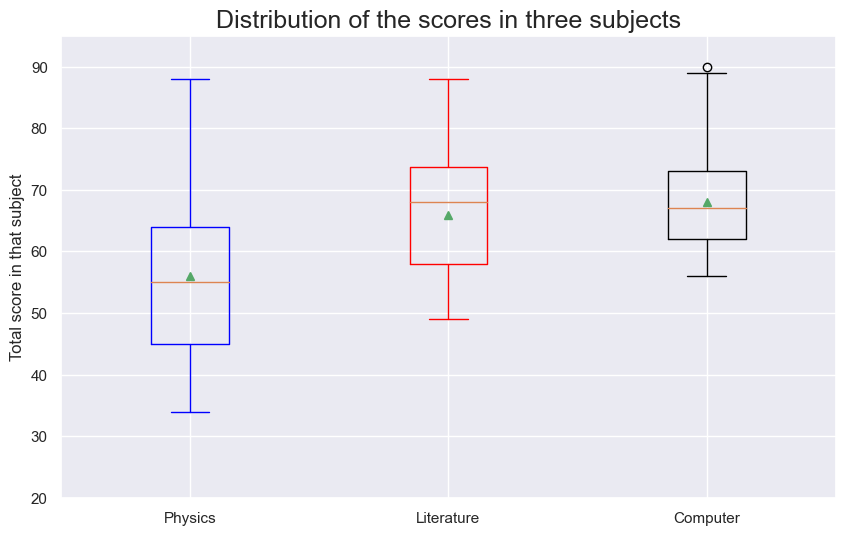

In [41]:
box = plt.boxplot(scores, showmeans=True, whis=1.5)

plt.setp(box['boxes'][0], color='blue')
plt.setp(box['caps'][0], color='blue')
plt.setp(box['caps'][1], color='blue')
plt.setp(box['whiskers'][0], color='blue')
plt.setp(box['whiskers'][1], color='blue')

plt.setp(box['boxes'][1], color='red')
plt.setp(box['caps'][2], color='red')
plt.setp(box['caps'][3], color='red')
plt.setp(box['whiskers'][2], color='red')
plt.setp(box['whiskers'][3], color='red')

plt.ylim([20, 95]) 
plt.grid(True, axis='y')  
plt.title('Distribution of the scores in three subjects', fontsize=18) 
plt.ylabel('Total score in that subject')            
plt.xticks([1,2,3], ['Physics','Literature','Computer'])


plt.show()